# DOTA Recommendation Engine

### First Pick: please read 3_Data_Analysis for help
Here is part of the result. For current game version, Viper and Ursa are you best chioces
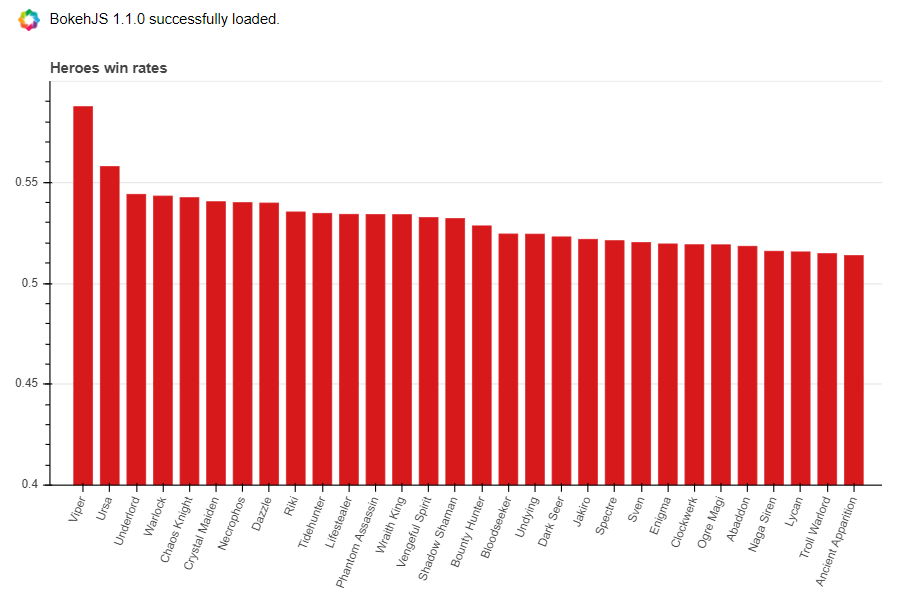

### Second Pick: please read 4_Frequency_Pattern for help
For second pick of 4th pick, your team have chance to pick two heroes. Here are some heroes combinations have hign win rate. It will help you to make decision
- Win rate of Anti-Mage and Viper is	 58.61878453038673%
- Win rate of Crystal Maiden and Viper is	 64.41929133858267%
- Win rate of Earthshaker and Viper is	 58.76068376068376%
- Win rate of Juggernaut and Viper is	 60.32411288069292%
- Win rate of Pudge and Viper is	 61.67652859960552%
- Win rate of Sven and Viper is	 61.31386861313869%
- Win rate of Kunkka and Viper is	 60.22374145431946%
- Win rate of Lion and Viper is	 59.05477980665951%
- Win rate of Shadow Shaman and Viper is	 61.246840775063184%
- Win rate of Shadow Shaman and Ursa is	 60.69809610154125%
- Win rate of Riki and Phantom Assassin is	 59.15324985092427%
- Win rate of Faceless Void and Viper is	 58.96834701055099%
- Win rate of Phantom Assassin and Viper is	 61.32442960489705%
- Win rate of Phantom Assassin and Dazzle is	 58.15002820078963%
- Win rate of Viper and Lifestealer is	 64.04328578455485%
- Win rate of Viper and Bounty Hunter is	 61.42433234421365%
- Win rate of Viper and Ursa is	 65.66265060240963%
- Win rate of Viper and Ogre Magi is	 60.3057757644394%
- Win rate of Lifestealer and Bounty Hunter is	 58.32780358327804%

### Later Pick: please read 5_Prediction_Models for help
Once you know some pick information, for example, more than 5 people have picked heroes. You can use our model to find your best choice
- Logistic Regression:Accuracy 64%,Very Fast
- KNN: Accuracy 62%, Very Slow
- Random Forest: Accuracy 61%, Fast
- XGBoost: Accuracy 66%, Fast
- SVM: Accuracy 64%, Slow

Here we will use XGBoost as our recommendation model, you can also change it to other models

In [1]:
# Run some setup code for this notebook.
from __future__ import print_function

import pandas as pd
import numpy as np
from progressbar import ProgressBar
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import json
import xgboost as xgb

In [2]:
df=pd.read_csv("out.csv")

#Translate heroes ID to a feature Vector
Vector_Data=[]

pbar = ProgressBar()
for i in pbar(range(0,len(df))):
    aa=np.zeros(250)
    for j in range(23,28):
        aa[df.iloc[i,j]]=1;
    for j in range(28,33):
        aa[df.iloc[i,j]+125]=1;
    Vector_Data.append(aa)
    
Vector_Data=pd.DataFrame(Vector_Data)

X=Vector_Data
y=df["radiant_win"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

100% |########################################################################|


In [3]:
#The name of heroes
heroesname=[]
for i in range(0,130):
    heroesname.append("empty")
    
fopen=open('heroes.json','r')
heroes=json.load(fopen)
fopen.close()

for i in range(0,len(heroes)):
    heroesname[heroes[i].get('id')]=heroes[i].get('localized_name')

In [22]:
xgb_cl = xgb.XGBClassifier(learning_rate=0.1,n_estimators=500,n_job=12)
xgb_cl.fit(X_train,y_train)
y_pred = xgb_cl.predict(X_test)
np.mean(y_pred == y_test)

0.6534251951336502

### Give a team in format of a list of 10 number. The number is the heroes ID. 0 means this player hasn't pick a hero. The name of 0 is empty
### Give your team called Radiant. If you are in Radiant team, Radiant = True. If you are in Dire team, Radiant = False

In [15]:
#Here is an example, you can change it
Radiant=True
team=[2,65,12,54,0,54,65,112,43,56]
for i in team:
    print(heroesname[i])

Axe
Batrider
Phantom Lancer
Lifestealer
empty
Lifestealer
Batrider
Winter Wyvern
Death Prophet
Clinkz


In [16]:
Feature_Vector=np.zeros(250)
for i in range(0,5):
    if(team[i]==0):
        continue
    Feature_Vector[team[i]]=1;
for j in range(28,33):
    if(team[i]==0):
        continue
    Feature_Vector[team[i]+125]=1;


In [17]:
Vectors=[]
for i in range(0,125):
    if(Radiant):
        aa=Feature_Vector.copy()
        aa[i]=1
        Vectors.append(aa)
    else:
        aa=Feature_Vector.copy()
        aa[i+125]=1
        Vectors.append(aa)

In [18]:
Vectors=pd.DataFrame(Vectors)
Vectors.head(5)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
predict_proba=xgb_cl.predict_proba(Vectors)

In [20]:
predict_list=[]
if(Radiant):
    for p in predict_proba:
        predict_list.append(p[0])
else:
    for p in predict_proba:
        predict_list.append(p[1])
        
predict_sort=np.argsort(predict_list)

In [21]:
#Here are the recommended Hereoes and the win probability
for i in range (0,10):
    print("The win probability of "+ heroesname[predict_sort[i]]+" is "
          +str((1-predict_list[predict_sort[i]])*100)+"%")


The win probability of Disruptor is 78.86943817138672%
The win probability of Underlord is 74.8990535736084%
The win probability of Viper is 73.92160892486572%
The win probability of Chaos Knight is 72.63507843017578%
The win probability of Tidehunter is 72.05837368965149%
The win probability of Necrophos is 71.46775722503662%
The win probability of Visage is 71.32534980773926%
The win probability of Riki is 71.26426696777344%
The win probability of Bounty Hunter is 71.03248238563538%
The win probability of Vengeful Spirit is 71.01039290428162%
